European Call Option Price: 10.2714
Arithmetic Asian Call Option Price: 5.7139
Geometric Asian Call Option Price: 5.4985
Lookback Floating Strike Call Option Price: 16.0416


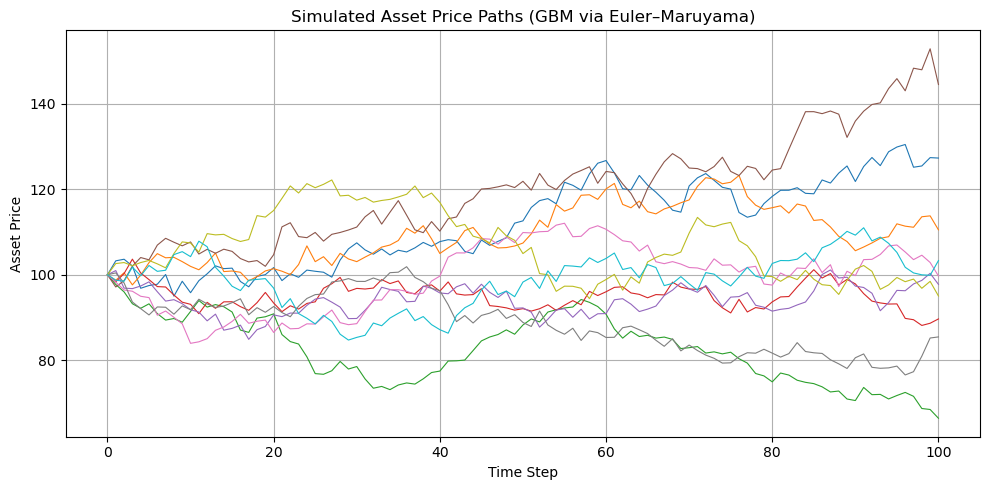

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- PARAMETERS ---
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 1.0       # Time to maturity (in years)
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
M = 100       # Number of time steps
N = 10000     # Number of simulations
dt = T / M    # Time step size

# --- GBM Simulation using Euler–Maruyama ---
def simulate_paths(S0, r, sigma, T, M, N):
    dt = T / M
    S = np.zeros((N, M+1))
    S[:, 0] = S0
    for t in range(1, M+1):
        Z = np.random.normal(0, 1, N)
        S[:, t] = S[:, t-1] + r * S[:, t-1] * dt + sigma * S[:, t-1] * np.sqrt(dt) * Z
    return S

# --- Option Pricing Functions ---
def european_call_price(S, K, r, T):
    payoff = np.maximum(S[:, -1] - K, 0)
    return np.exp(-r*T) * np.mean(payoff)

def arithmetic_asian_call_price(S, K, r, T):
    average_price = np.mean(S[:, 1:], axis=1)
    payoff = np.maximum(average_price - K, 0)
    return np.exp(-r*T) * np.mean(payoff)

def geometric_asian_call_price(S, K, r, T):
    log_avg = np.mean(np.log(S[:, 1:]), axis=1)
    geom_avg = np.exp(log_avg)
    payoff = np.maximum(geom_avg - K, 0)
    return np.exp(-r*T) * np.mean(payoff)

def lookback_call_floating_strike(S, r, T):
    min_price = np.min(S[:, 1:], axis=1)
    payoff = S[:, -1] - min_price
    return np.exp(-r*T) * np.mean(payoff)

# --- Run Simulations ---
S_paths = simulate_paths(S0, r, sigma, T, M, N)

# --- Compute Prices ---
european = european_call_price(S_paths, K, r, T)
asian_arith = arithmetic_asian_call_price(S_paths, K, r, T)
asian_geom = geometric_asian_call_price(S_paths, K, r, T)
lookback = lookback_call_floating_strike(S_paths, r, T)

# --- Print Results ---
print(f"European Call Option Price: {european:.4f}")
print(f"Arithmetic Asian Call Option Price: {asian_arith:.4f}")
print(f"Geometric Asian Call Option Price: {asian_geom:.4f}")
print(f"Lookback Floating Strike Call Option Price: {lookback:.4f}")

# --- Plot Sample Paths ---
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(S_paths[i], lw=0.8)
plt.title("Simulated Asset Price Paths (GBM via Euler–Maruyama)")
plt.xlabel("Time Step")
plt.ylabel("Asset Price")
plt.grid(True)
plt.tight_layout()
plt.show()
